# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# question 1

In [3]:
from inauguralproject import InauguralprojectClass

In [4]:
model = InauguralprojectClass()

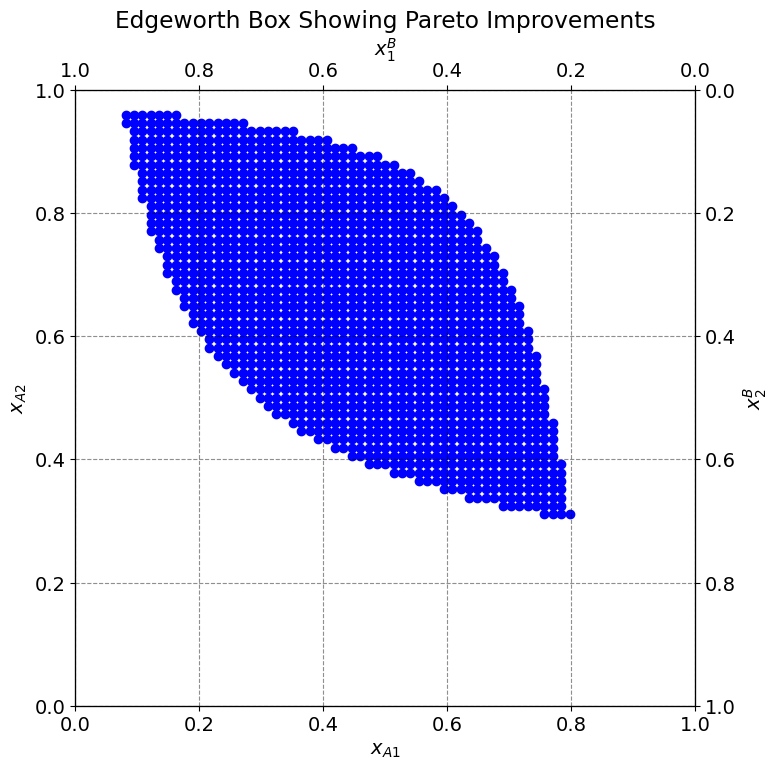

In [5]:
N = 75
x_grid = np.linspace(0, 1, N)

uA_initial = model.utility_A(model.w1A, model.w2A)
uB_initial = model.utility_B(model.w1B, model.w2B)

pareto_set = []

for xA1 in x_grid:
    for xA2 in x_grid:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        
        uA_new = model.utility_A(xA1, xA2)
        uB_new = model.utility_B(xB1, xB2)
        
        
        if uA_new >= uA_initial and uB_new >= uB_initial:
            pareto_set.append((xA1, xA2))


pareto_xA1, pareto_xA2 = zip(*pareto_set) if pareto_set else ([], [])

# Plotting the Edgeworth Box with Pareto improvements
plt.figure(figsize=(8, 8))


plt.scatter(pareto_xA1, pareto_xA2, color='blue', label='Pareto Improvements for A')


plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

plt.xlim(0, 1)
plt.ylim(0, 1)


ax2 = plt.twiny()  
ax3 = plt.twinx()  

ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)


ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')


ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)


plt.show()

# Question 2

In [6]:
N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

model = InauguralprojectClass()  # Initialize the model

errors_1 = []
errors_2 = []

for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1)  # Assuming you want to use epsilons method from the class
    errors_1.append(eps1)
    errors_2.append(eps2)

print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5267, ε1 = 0.4759, ε2 = -0.2507
p1 = 0.5533, ε1 = 0.4241, ε2 = -0.2347
p1 = 0.5800, ε1 = 0.3770, ε2 = -0.2187
p1 = 0.6067, ε1 = 0.3341, ε2 = -0.2027
p1 = 0.6333, ε1 = 0.2947, ε2 = -0.1867
p1 = 0.6600, ε1 = 0.2586, ε2 = -0.1707
p1 = 0.6867, ε1 = 0.2252, ε2 = -0.1547
p1 = 0.7133, ε1 = 0.1944, ε2 = -0.1387
p1 = 0.7400, ε1 = 0.1658, ε2 = -0.1227
p1 = 0.7667, ε1 = 0.1391, ε2 = -0.1067
p1 = 0.7933, ε1 = 0.1143, ε2 = -0.0907
p1 = 0.8200, ε1 = 0.0911, ε2 = -0.0747
p1 = 0.8467, ε1 = 0.0693, ε2 = -0.0587
p1 = 0.8733, ε1 = 0.0489, ε2 = -0.0427
p1 = 0.9000, ε1 = 0.0296, ε2 = -0.0267
p1 = 0.9267, ε1 = 0.0115, ε2 = -0.0107
p1 = 0.9533, ε1 = -0.0056, ε2 = 0.0053
p1 = 0.9800, ε1 = -0.0218, ε2 = 0.0213
p1 = 1.0067, ε1 = -0.0371, ε2 = 0.0373
p1 = 1.0333, ε1 = -0.0516, ε2 = 0.0533
p1 = 1.0600, ε1 = -0.0654, ε2 = 0.0693
p1 = 1.0867, ε1 = -0.0785, ε2 = 0.0853
p1 = 1.1133, ε1 = -0.0910, ε2 = 0.1013
p1 = 1.1400, ε1 = -0.1029,

# Question 3

The market clearing price is 0.953


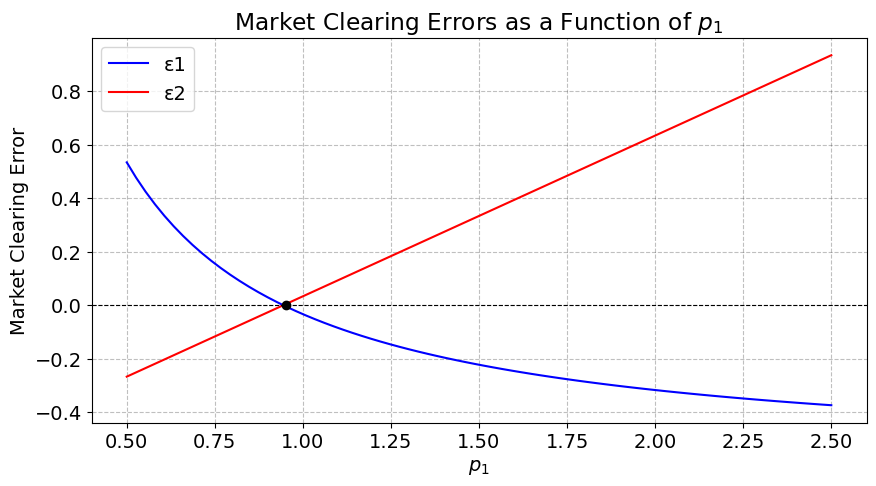

In [7]:
model = InauguralprojectClass() 

N = 75
p1_range = np.linspace(0.5, 2.5, N + 1)

errors_1 = []
errors_2 = []

# Calculate errors for each p1 in range
for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

# Combine errors to find minimum absolute sum of errors
combined_errors = np.abs(np.array(errors_1)) + np.abs(np.array(errors_2))
min_abs_error_index = np.argmin(combined_errors)
market_clearing_p1 = p1_range[min_abs_error_index]

# Printing the market clearing price
print(f"The market clearing price is {market_clearing_p1:.3f}")

# Plotting the errors
plt.figure(figsize=(10, 5))
plt.plot(p1_range, errors_1, label='ε1', color='blue')
plt.plot(p1_range, errors_2, label='ε2', color='red')
plt.scatter([market_clearing_p1], [0], color='black', zorder=5)  # Mark the minimum error point
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

Explain your code and procedure

In [5]:
model = InauguralprojectClass()

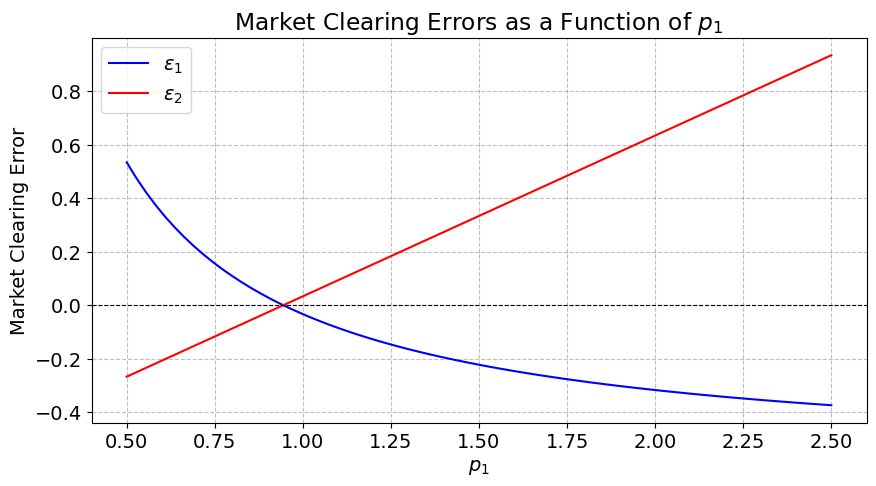

(0, 0.9324324324324325)

In [6]:
#Using N from Question 1
P1 = np.linspace(0.5, 2.5, N)

eps1_values = []
eps2_values = []
for p1 in P1:
    eps1, eps2 = model.epsilons(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(P1, eps1_values, label='$\\epsilon_1$', color='blue')
plt.plot(P1, eps2_values, label='$\\epsilon_2$', color='red')
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()


min_abs_eps1 = 0
min_p1_index = np.argmin(np.abs(eps1_values))
min_p1 = P1[min_p1_index]
min_abs_eps1, min_p1

Then we see that the clearing price is 0.9324

# Question 4.a

In [7]:
P1 = np.linspace(0.5, 2.5, N)

max_utility = -np.inf
optimal_p1 = None

# Iterate over each p1 in P1 to find the one that maximizes utility
for p1 in P1:
    x1A, x2A = model.demand_A(p1)  
    current_utility = model.utility_A(x1A, x2A)  
    if current_utility > max_utility:  
        max_utility = current_utility
        optimal_p1 = p1


optimal_p1, max_utility

(2.5, 0.8966987730519458)

The optimal is thereby, (p1,Ua)=(2.5,0.896699)

# Question 4.b

In [8]:
from scipy.optimize import minimize_scalar

In [9]:
from scipy.optimize import minimize

initial_p1 = [1.0]


result = minimize(model.negative_utility_A, initial_p1, bounds=[(0, 10)])  

# The optimal p1 value 
optimal_p1_unbounded = result.x[0]
optimal_utility_unbounded = -result.fun

optimal_p1_unbounded, optimal_utility_unbounded


(10.0, 2.038497429247681)

If any postive price can be used, it can be seen, that our optimal p will go towards infinity, if a boundarie is not set. 

# Question 5.a

In [10]:
from scipy.optimize import minimize

In [11]:
from scipy.optimize import minimize
import numpy as np


initial_utility_A = model.utility_A(model.w1A, model.w2A)
initial_utility_B = model.utility_B(model.w1B, model.w2B)


constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - initial_utility_A},
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

# Bounds to ensure x1A and x2A are within [0, 1]
bounds = [(0, 1), (0, 1)]

x0 = [model.w1A, model.w2A]

# Solve the optimization problem
result = minimize(model.max_u_a, x0, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  
else:
    optimal_x1A, optimal_x2A, optimal_utility = None, None, None

(optimal_x1A, optimal_x2A), optimal_utility


((0.5757424934377142, 0.8444397130890112), 0.7432276550447664)

So, allocation will be, (x1a,x2a)=(0.5757,0.84444) 
and uA=0.7432

# Question 5.b

In [12]:
from scipy.optimize import minimize
import numpy as np

initial_utility_B = model.utility_B(model.w1B, model.w2B)

constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

bounds = [(0, 1), (0, 1)]


x0 = [model.w1A, model.w2A]

# Solve the optimization problem for 5b
result = minimize(model.max_u_a, x0, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  
else:
    optimal_x1A, optimal_x2A, optimal_utility = None, None, None

(optimal_x1A, optimal_x2A), optimal_utility


((0.5757450601538892, 0.8444377859258702), 0.7432276287154398)

Here we see that, by changing the restrictions, the allocation will still be the same. This is because, the constraints are mainly the identical.

# Question 6.a

In [13]:
from scipy.optimize import minimize
import numpy as np




# Bounds to ensure x1A and x2A are within [0, 1]
bounds_for_6a = [(0, 1), (0, 1)]

x0_for_6a = [0.5, 0.5]

# Solve the optimization problem for 
result_6a = minimize(model.max_u_ab, x0_for_6a, method='SLSQP', bounds=bounds)

if result_6a.success:
    optimal_x1A_6a, optimal_x2A_6a = result_6a.x
    optimal_utility_6a = -(result_6a.fun) 
else:
    optimal_x1A_6a, optimal_x2A_6a, optimal_utility_6a = None, None, None

(optimal_x1A_6a, optimal_x2A_6a), optimal_utility_6a


((0.33341166147388446, 0.6665883190561481), 1.0582673533675457)

The allocation is, (x1a,x2a)=(0.3334,0.66659) Ua+Ub=1.058

# Question 6.b

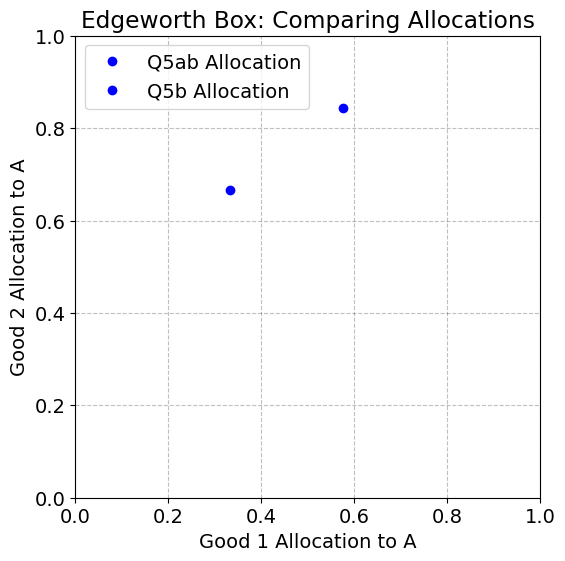

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))


plt.plot(optimal_x1A, optimal_x2A, 'bo', label='Q5ab Allocation')

plt.plot(optimal_x1A_6a, optimal_x2A_6a, 'bo', label='Q5b Allocation')


plt.xlabel('Good 1 Allocation to A')
plt.ylabel('Good 2 Allocation to A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('Edgeworth Box: Comparing Allocations')
plt.show()


# Question 7

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

W = np.random.uniform(low=0, high=1, size=(50, 2))




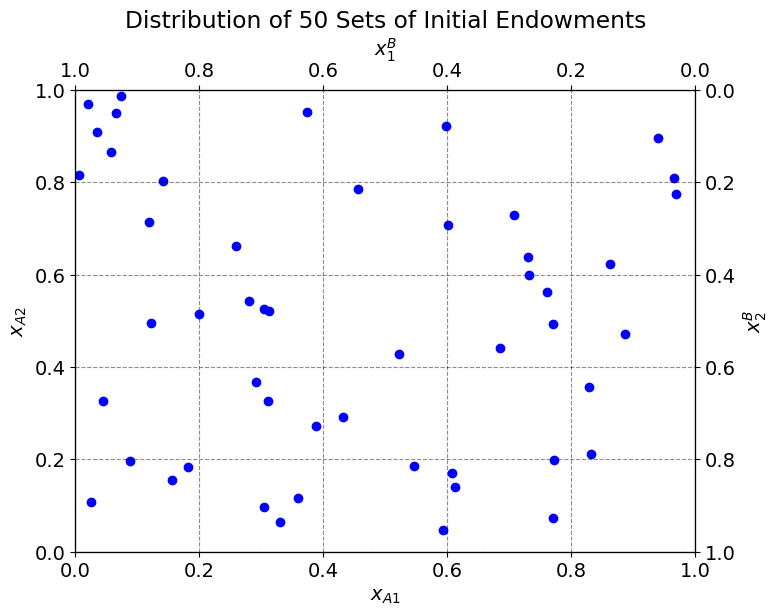

In [16]:
#plotting
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1], color='blue', marker='o', label='Initial Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Distribution of 50 Sets of Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

plt.xlim(0, 1)
plt.ylim(0, 1)


ax2 = plt.twiny()  
ax3 = plt.twinx()  


ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')


ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()


plt.grid(True)


plt.show()

# Question 8

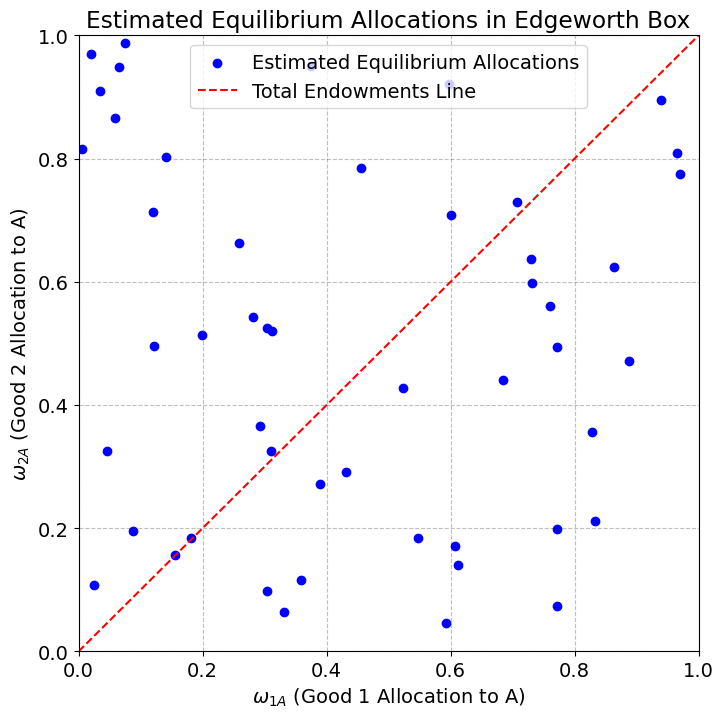

In [17]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  
W = np.random.uniform(0, 1, (50, 2))


def estimate_equilibrium(omega_1A, omega_2A):
    
    return omega_1A, omega_2A


equilibrium_allocations = np.array([estimate_equilibrium(omega[0], omega[1]) for omega in W])


plt.figure(figsize=(8, 8))
plt.scatter(equilibrium_allocations[:, 0], equilibrium_allocations[:, 1], color='blue', label='Estimated Equilibrium Allocations')
plt.title('Estimated Equilibrium Allocations in Edgeworth Box')
plt.xlabel('$\omega_{1A}$ (Good 1 Allocation to A)')
plt.ylabel('$\omega_{2A}$ (Good 2 Allocation to A)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline((0, 0), (1, 1), color='red', linestyle='--', label='Total Endowments Line')
plt.legend()
plt.grid(True)
plt.show()
